In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
round(df.isna().mean()*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [ ]:
df.dropna(subset=["Embarked"],inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

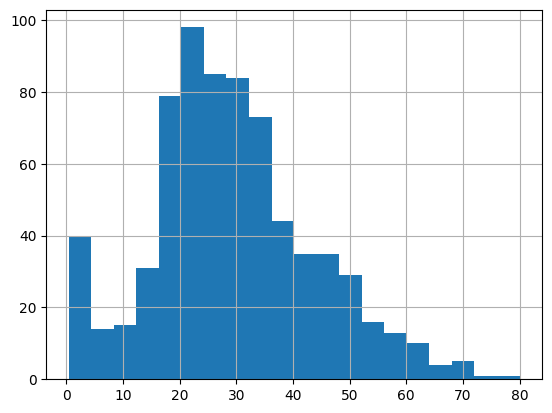

In [ ]:
df["Age"].hist(bins=20)

In [ ]:
df.groupby(["Sex","Pclass"])["Age"].mean()

Sex     Pclass
female  1         34.240964
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
df["Age"]=df.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
798,0,3,male,30.0,0,0,7.2292,C


In [ ]:
df.survived.value_counts(normalize=True)*100

,proportion
survived,
0,61.754781
1,38.245219


<Axes: xlabel='survived', ylabel='count'>

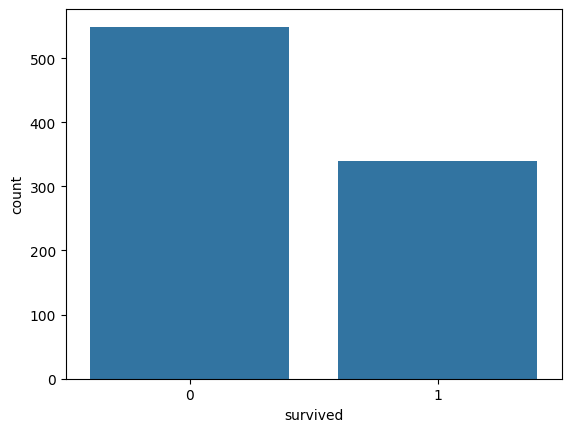

In [ ]:
sns.countplot(x="survived",data=df)

<Axes: xlabel='survived', ylabel='count'>

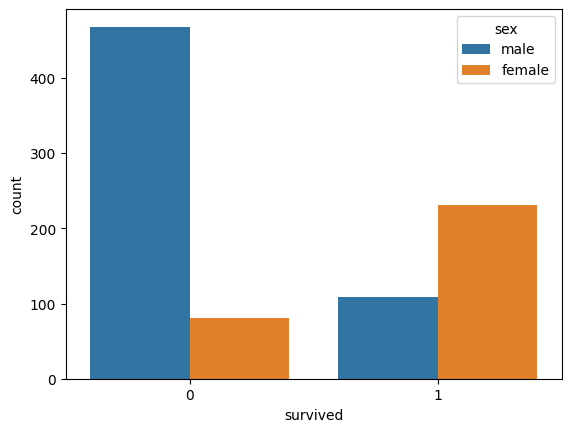

In [ ]:
sns.countplot(x="survived",hue="sex",data=df)

In [ ]:
df.pclass.value_counts(normalize=True)*100

,proportion
pclass,
3,55.230596
1,24.071991
2,20.697413


In [ ]:
df.sibsp.value_counts(normalize=True)*100

,proportion
sibsp,
0,68.166479
1,23.509561
2,3.149606
4,2.024747
3,1.799775
8,0.787402
5,0.562430


In [ ]:
def values_counts (df,col):
  print(df[col].value_counts(normalize=True)*100)
  sns.countplot(x=col,data=df)
  plt.show()

pclass
3    55.230596
1    24.071991
2    20.697413
Name: proportion, dtype: float64


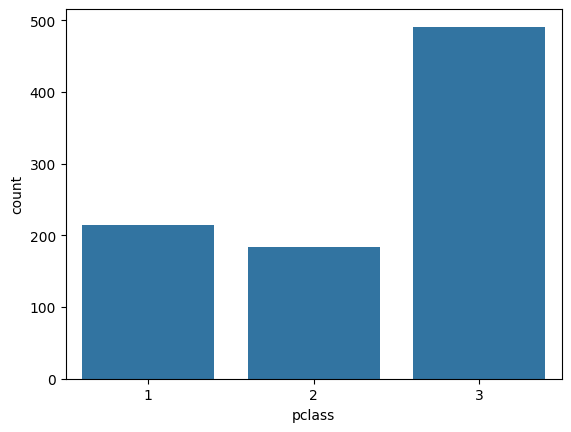

sex
male      64.904387
female    35.095613
Name: proportion, dtype: float64


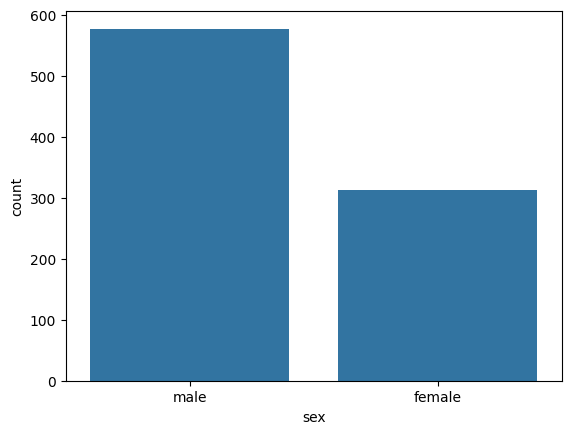

sibsp
0    68.166479
1    23.509561
2     3.149606
4     2.024747
3     1.799775
8     0.787402
5     0.562430
Name: proportion, dtype: float64


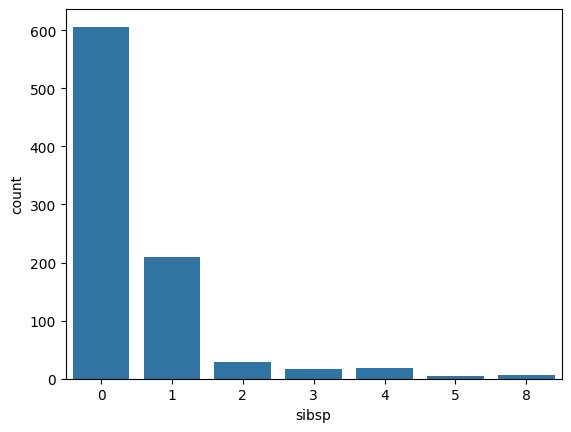

parch
0    76.040495
1    13.273341
2     8.998875
5     0.562430
3     0.562430
4     0.449944
6     0.112486
Name: proportion, dtype: float64


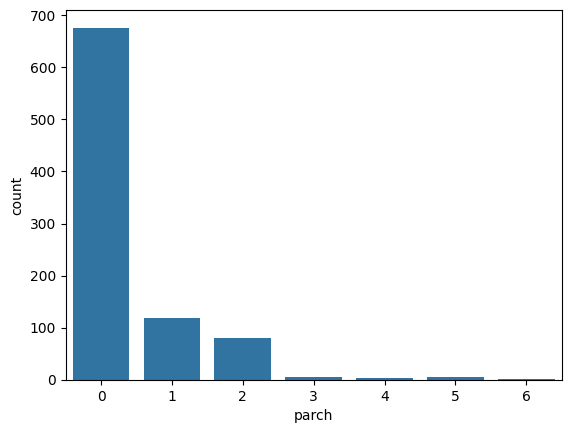

embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


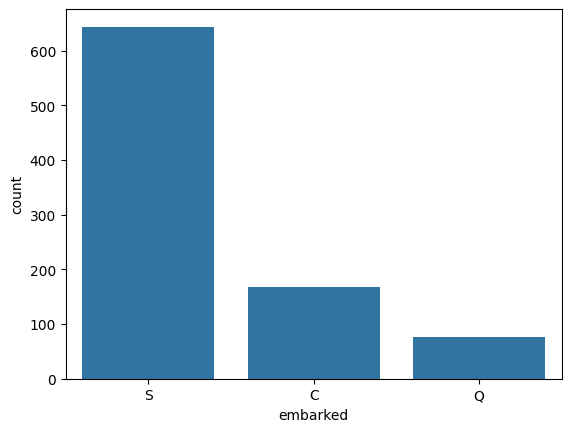

In [29]:
for col in df.columns.drop(["age","fare","survived"]):
  values_counts(df,col)

In [31]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
848,0,2,male,28.0,0,1,33.0,S


In [32]:
df.groupby("pclass").survived.mean()

,survived
pclass,
1,0.626168
2,0.472826
3,0.242363


In [35]:
df.survived.mean()

np.float64(0.38245219347581555)

/tmp/ipython-input-3419226214.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="pclass",y="survived",data=df,ci=None)


<Axes: xlabel='pclass', ylabel='survived'>

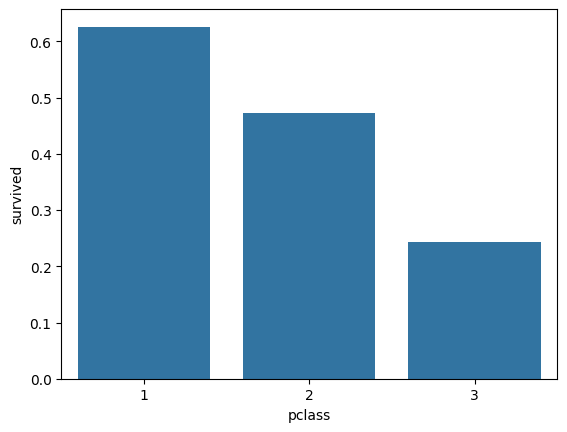

In [34]:
sns.barplot(x="pclass",y="survived",data=df,ci=None)

<Axes: xlabel='pclass', ylabel='age'>

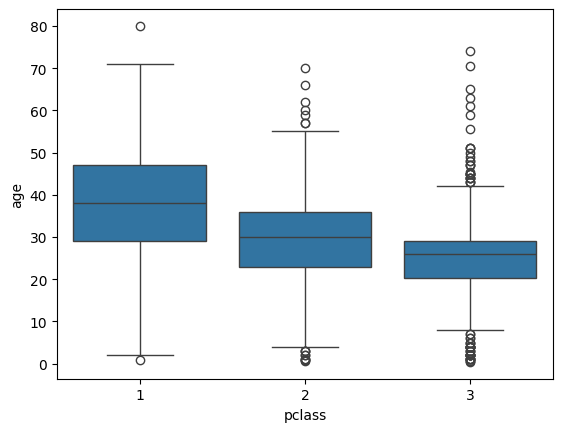

In [36]:
sns.boxplot(x="pclass",y="age",data=df)

<Axes: xlabel='fare'>

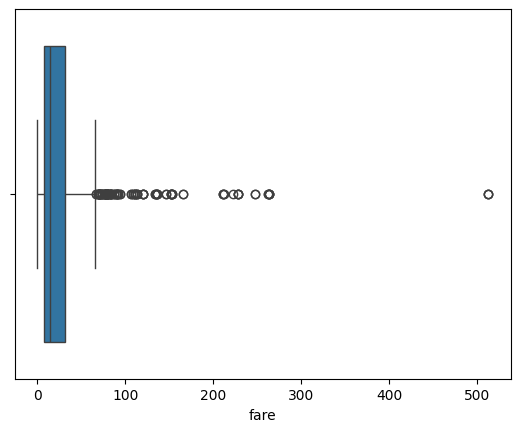

In [37]:
sns.boxplot(x="fare",data=df)

In [40]:
df=df[df["fare"]<200]

<Axes: xlabel='fare'>

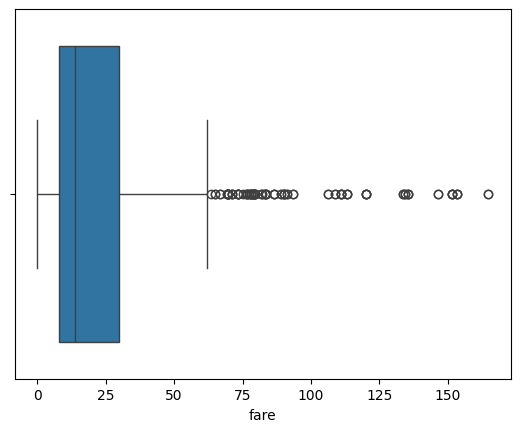

In [41]:
sns.boxplot(x="fare",data=df)

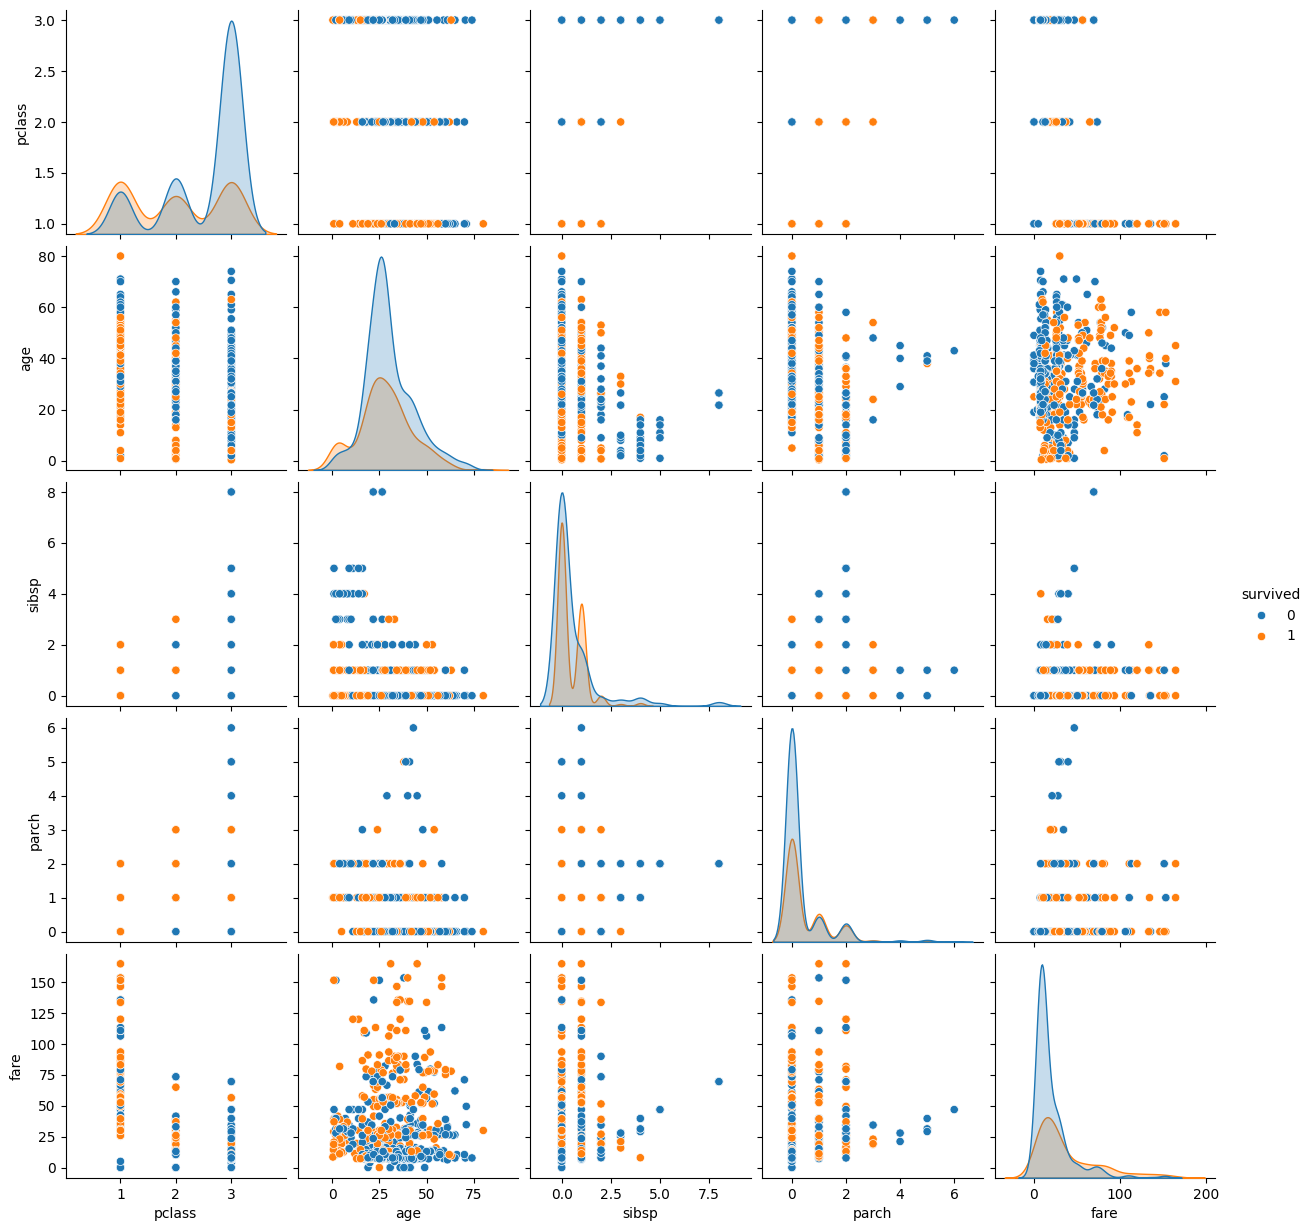

In [42]:
sns.pairplot(df,hue="survived")

In [47]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
154,0,3,male,26.507589,0,0,7.3125,S


In [51]:
df.select_dtypes(include=np.number).corr()["survived"]

,survived
survived,1.000000
pclass,-0.326075
age,-0.073744
sibsp,-0.039239
parch,0.081954
fare,0.294964


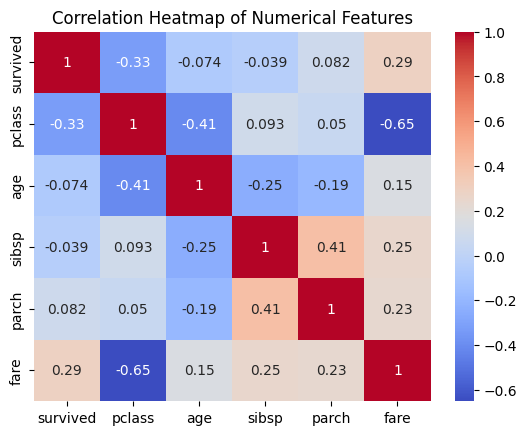

In [52]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()